# Perceptron
Uma implementação do zero em python

# Funções para facilitar operações com vetores

In [159]:
def scalar(value, vec):
    return [value * vec_i for vec_i in vec]

def dot(v1, v2):
    return sum([v1_i * v2_i for v1_i, v2_i in zip(v1, v2)])

def vec_sum(v1, v2):
    return [v1_i + v2_i for v1_i, v2_i in zip(v1, v2)]

# Definição do modelo

In [160]:
class Perceptron:
    def __init__(self, num_inputs):
        self.num_inputs = num_inputs
        self.weights = [0 for _ in range(num_inputs)]
        self.bias = 0
    
    def forward(self, inp):
        return 1 if (dot(inp, self.weights) + self.bias > 0) else 0
    
    def backward(self, inp, out):
        error = out - self.forward(inp)
        self.weights = vec_sum(self.weights, scalar(error, inp))
        self.bias += error
        return error == 0
    
    def train(self, inp, out, epochs):
        errors_rate = []
        num_inp = len(inp)
        for epoch in range(epochs):
            num_errors = 0
            for inp_i, out_i in zip(inp, out):
                if not self.backward(inp_i, out_i):
                    num_errors += 1
            errors_rate.append(num_errors/num_inp)
        return errors_rate
    
    def test(self, inp):
        return map(self.forward, inp)

    def evaluate(self, inp, out):
        predictions = self.test(inp)
        return sum([1 if i == j else 0 for i, j in zip(predictions, out)])/len(inp)

# Preparação do comjunto de dados

In [161]:
from random import shuffle

with open('data.txt', 'r') as file:
    lines = file.readlines()

num_to_train = 60
num_to_test = 100 - num_to_train

lines = [list(map(float, line.split('\t'))) for line in lines]
to_train = lines[0:num_to_train//2] + lines[50:50+num_to_train//2]
shuffle(to_train)
to_test = lines[50-num_to_test//2:50] + lines[100-num_to_test//2:100]

x_train = [line[:2] for line in to_train]
y_train = [line[2] for line in to_train]

x_test = [line[:2] for line in to_test]
y_test = [line[2] for line in to_test]

In [162]:
import matplotlib.pyplot as plt

def plot_set(x, y):
    class0 = list(filter(lambda x: x[1] == 0, zip(x, y)))
    class1 = list(filter(lambda x: x[1] == 1, zip(x, y)))
    plt.scatter([i[0][0] for i in class0], [i[0][1] for i in class0], label='class 0')
    plt.scatter([i[0][0] for i in class1], [i[0][1] for i in class1], label='class 1')
    plt.legend()

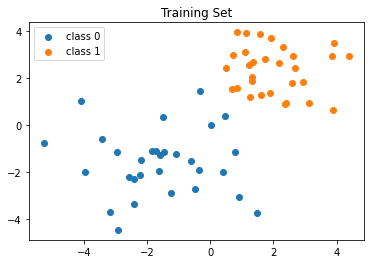

In [163]:
plot_set(x_train, y_train)
plt.title('Training Set')
plt.show()

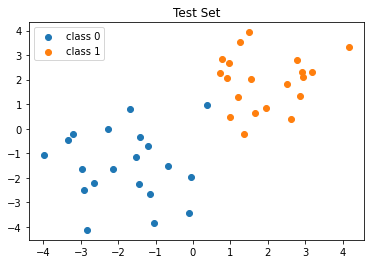

In [164]:
plot_set(x_test, y_test)
plt.title('Test Set')
plt.show()

# Treinando o modelo

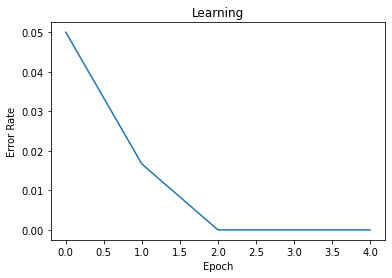

In [165]:
perceptron = Perceptron(2)

errors_rate = perceptron.train(x_train, y_train, 5)
plt.plot(range(5), errors_rate)
plt.title('Learning')
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.show()

# Avaliando o modelo

In [166]:
print(f'Precisão nos testes: {perceptron.evaluate(x_test, y_test)*100}%')

Precisão nos testes: 97.5%


# Reta de decisão

In [167]:
a = -perceptron.weights[0]/perceptron.weights[1]
b = -perceptron.bias/perceptron.weights[1]

x_min = -4
y_min = a*x_min + b

x_max = 4
y_max = a*x_max + b

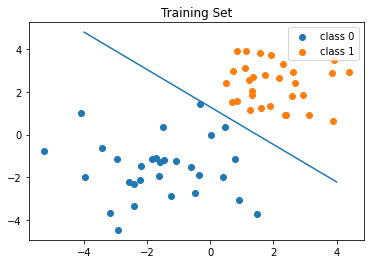

In [168]:
plot_set(x_train, y_train)
plt.plot([x_min, x_max], [y_min, y_max])
plt.title('Training Set')
plt.show()

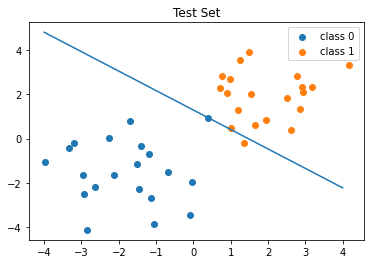

In [169]:
plot_set(x_test, y_test)
plt.plot([x_min, x_max], [y_min, y_max])
plt.title('Test Set')
plt.show()